# Images & Rendering
# |

## Shaded & power normalized rendering


The Mandelbrot set rendering can be improved by using a normalized recount
associated with a power normalized colormap (gamma=0.3). Rendering can be
further enhanced thanks to shading.

The `maxiter` gives the precision of the computation. `maxiter=200` should
take a few seconds on most modern laptops.

In [4]:
import numpy as np


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)
    C = X + Y[:, None]*1j
    N = np.zeros(C.shape, dtype=int)
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000/2
    ymin, ymax, yn = -1.25, +1.25, 2500/2
    maxiter = 200
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 -
                          np.log(np.log(abs(Z)))/np.log(2) +
                          log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    year = time.strftime("%Y")
    major, minor, micro = matplotlib.__version__.split('.', 2)
    text = ("The Mandelbrot fractal set\n"
            "Rendered with matplotlib %s.%s, %s - http://matplotlib.org"
            % (major, minor, year))
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()

TypeError: 'float' object cannot be interpreted as an integer

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook

w, h = 512, 512

datafile = cbook.get_sample_data('ct.raw.gz', asfileobj=True)
s = datafile.read()
A = np.fromstring(s, np.uint16).astype(float)
A *= 1.0 / max(A)
A.shape = w, h

extent = (0, 25, 0, 25)
im = plt.imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
plt.plot(x, y, 'o')

plt.title('CT density')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/codespace/.local/lib/python3.10/site-packages/matplotlib/mpl-data/sample_data/ct.raw.gz'

Displays a set of subplots with an MRI image, its intensity histogram and
some EEG traces.

/tmp/ipykernel_36343/3867437869.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  im = np.fromstring(dfile.read(), np.uint16).astype(float)


Loading EEG /home/codespace/.local/lib/python3.10/site-packages/matplotlib/mpl-data/sample_data/eeg.dat


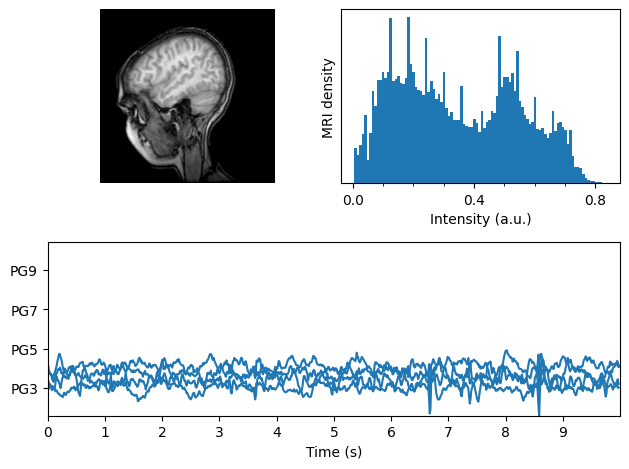

In [2]:
from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.cm as cm

from matplotlib.collections import LineCollection
from matplotlib.ticker import MultipleLocator

fig = plt.figure("MRI_with_EEG")

# Load the MRI data (256x256 16 bit integers)
dfile = cbook.get_sample_data('s1045.ima.gz')
im = np.fromstring(dfile.read(), np.uint16).astype(float)
im.shape = (256, 256)
dfile.close()

# Plot the MRI image
ax0 = fig.add_subplot(2, 2, 1)
ax0.imshow(im, cmap=cm.gray)
ax0.axis('off')

# Plot the histogram of MRI intensity
ax1 = fig.add_subplot(2, 2, 2)
im = np.ravel(im)
im = im[np.nonzero(im)]  # Ignore the background
im = im / (2**16 - 1)  # Normalize
ax1.hist(im, bins=100)
ax1.xaxis.set_major_locator(MultipleLocator(0.4))
ax1.minorticks_on()
ax1.set_yticks([])
ax1.set_xlabel('Intensity (a.u.)')
ax1.set_ylabel('MRI density')

# Load the EEG data
numSamples, numRows = 800, 4
eegfile = cbook.get_sample_data('eeg.dat', asfileobj=False)
print('Loading EEG %s' % eegfile)
data = np.fromfile(eegfile, dtype=float)
data.shape = (numSamples, numRows)
t = 10.0 * np.arange(numSamples) / numSamples

# Plot the EEG
ticklocs = []
ax2 = fig.add_subplot(2, 1, 2)
ax2.set_xlim(0, 10)
ax2.set_xticks(np.arange(10))
dmin = data.min()
dmax = data.max()
dr = (dmax - dmin) * 0.7  # Crowd them a bit.
y0 = dmin
y1 = (numRows - 1) * dr + dmax
ax2.set_ylim(y0, y1)

segs = []
for i in range(numRows):
    segs.append(np.hstack((t[:, np.newaxis], data[:, i, np.newaxis])))
    ticklocs.append(i * dr)

offsets = np.zeros((numRows, 2), dtype=float)
offsets[:, 1] = ticklocs

lines = LineCollection(segs, offsets=offsets, transOffset=None)
ax2.add_collection(lines)

# Set the yticks to use axes coordinates on the y axis
ax2.set_yticks(ticklocs)
ax2.set_yticklabels(['PG3', 'PG5', 'PG7', 'PG9'])

ax2.set_xlabel('Time (s)')


plt.tight_layout()
plt.show()

Firefox

This example shows how to create the Firefox logo with path and patches.

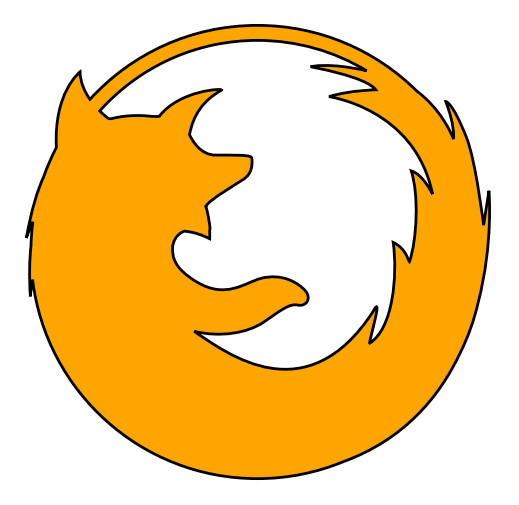

In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# From: http://raphaeljs.com/icons/#firefox
firefox = "M28.4,22.469c0.479-0.964,0.851-1.991,1.095-3.066c0.953-3.661,0.666-6.854,0.666-6.854l-0.327,2.104c0,0-0.469-3.896-1.044-5.353c-0.881-2.231-1.273-2.214-1.274-2.21c0.542,1.379,0.494,2.169,0.483,2.288c-0.01-0.016-0.019-0.032-0.027-0.047c-0.131-0.324-0.797-1.819-2.225-2.878c-2.502-2.481-5.943-4.014-9.745-4.015c-4.056,0-7.705,1.745-10.238,4.525C5.444,6.5,5.183,5.938,5.159,5.317c0,0-0.002,0.002-0.006,0.005c0-0.011-0.003-0.021-0.003-0.031c0,0-1.61,1.247-1.436,4.612c-0.299,0.574-0.56,1.172-0.777,1.791c-0.375,0.817-0.75,2.004-1.059,3.746c0,0,0.133-0.422,0.399-0.988c-0.064,0.482-0.103,0.971-0.116,1.467c-0.09,0.845-0.118,1.865-0.039,3.088c0,0,0.032-0.406,0.136-1.021c0.834,6.854,6.667,12.165,13.743,12.165l0,0c1.86,0,3.636-0.37,5.256-1.036C24.938,27.771,27.116,25.196,28.4,22.469zM16.002,3.356c2.446,0,4.73,0.68,6.68,1.86c-2.274-0.528-3.433-0.261-3.423-0.248c0.013,0.015,3.384,0.589,3.981,1.411c0,0-1.431,0-2.856,0.41c-0.065,0.019,5.242,0.663,6.327,5.966c0,0-0.582-1.213-1.301-1.42c0.473,1.439,0.351,4.17-0.1,5.528c-0.058,0.174-0.118-0.755-1.004-1.155c0.284,2.037-0.018,5.268-1.432,6.158c-0.109,0.07,0.887-3.189,0.201-1.93c-4.093,6.276-8.959,2.539-10.934,1.208c1.585,0.388,3.267,0.108,4.242-0.559c0.982-0.672,1.564-1.162,2.087-1.047c0.522,0.117,0.87-0.407,0.464-0.872c-0.405-0.466-1.392-1.105-2.725-0.757c-0.94,0.247-2.107,1.287-3.886,0.233c-1.518-0.899-1.507-1.63-1.507-2.095c0-0.366,0.257-0.88,0.734-1.028c0.58,0.062,1.044,0.214,1.537,0.466c0.005-0.135,0.006-0.315-0.001-0.519c0.039-0.077,0.015-0.311-0.047-0.596c-0.036-0.287-0.097-0.582-0.19-0.851c0.01-0.002,0.017-0.007,0.021-0.021c0.076-0.344,2.147-1.544,2.299-1.659c0.153-0.114,0.55-0.378,0.506-1.183c-0.015-0.265-0.058-0.294-2.232-0.286c-0.917,0.003-1.425-0.894-1.589-1.245c0.222-1.231,0.863-2.11,1.919-2.704c0.02-0.011,0.015-0.021-0.008-0.027c0.219-0.127-2.524-0.006-3.76,1.604C9.674,8.045,9.219,7.95,8.71,7.95c-0.638,0-1.139,0.07-1.603,0.187c-0.05,0.013-0.122,0.011-0.208-0.001C6.769,8.04,6.575,7.88,6.365,7.672c0.161-0.18,0.324-0.356,0.495-0.526C9.201,4.804,12.43,3.357,16.002,3.356z"


def svg_parse(path):
    commands = {'M': (Path.MOVETO,),
                'L': (Path.LINETO,),
                'Q': (Path.CURVE3,)*2,
                'C': (Path.CURVE4,)*3,
                'Z': (Path.CLOSEPOLY,)}
    path_re = re.compile(r'([MLHVCSQTAZ])([^MLHVCSQTAZ]+)', re.IGNORECASE)
    float_re = re.compile(r'(?:[\s,]*)([+-]?\d+(?:\.\d+)?)')
    vertices = []
    codes = []
    last = (0, 0)
    for cmd, values in path_re.findall(path):
        points = [float(v) for v in float_re.findall(values)]
        points = np.array(points).reshape((len(points)//2, 2))
        if cmd.islower():
            points += last
        cmd = cmd.capitalize()
        last = points[-1]
        codes.extend(commands[cmd])
        vertices.extend(points.tolist())
    return codes, vertices

# SVG to matplotlib
codes, verts = svg_parse(firefox)
verts = np.array(verts)
path = Path(verts, codes)

# Make upside down
verts[:, 1] *= -1
xmin, xmax = verts[:, 0].min()-1, verts[:, 0].max()+1
ymin, ymax = verts[:, 1].min()-1, verts[:, 1].max()+1

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

# White outline (width = 6)
patch = patches.PathPatch(path, facecolor='None', edgecolor='w', lw=6)
ax.add_patch(patch)

# Actual shape with black outline
patch = patches.PathPatch(path, facecolor='orange', edgecolor='k', lw=2)
ax.add_patch(patch)

# Centering
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# Display
plt.show()